In [1]:
# USANDO O K-NN NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS K'S PARA A BASE

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

import random
random.seed(10)


#definindo os nomes de cada coluna   
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

# print("Primeiros dados")
# print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

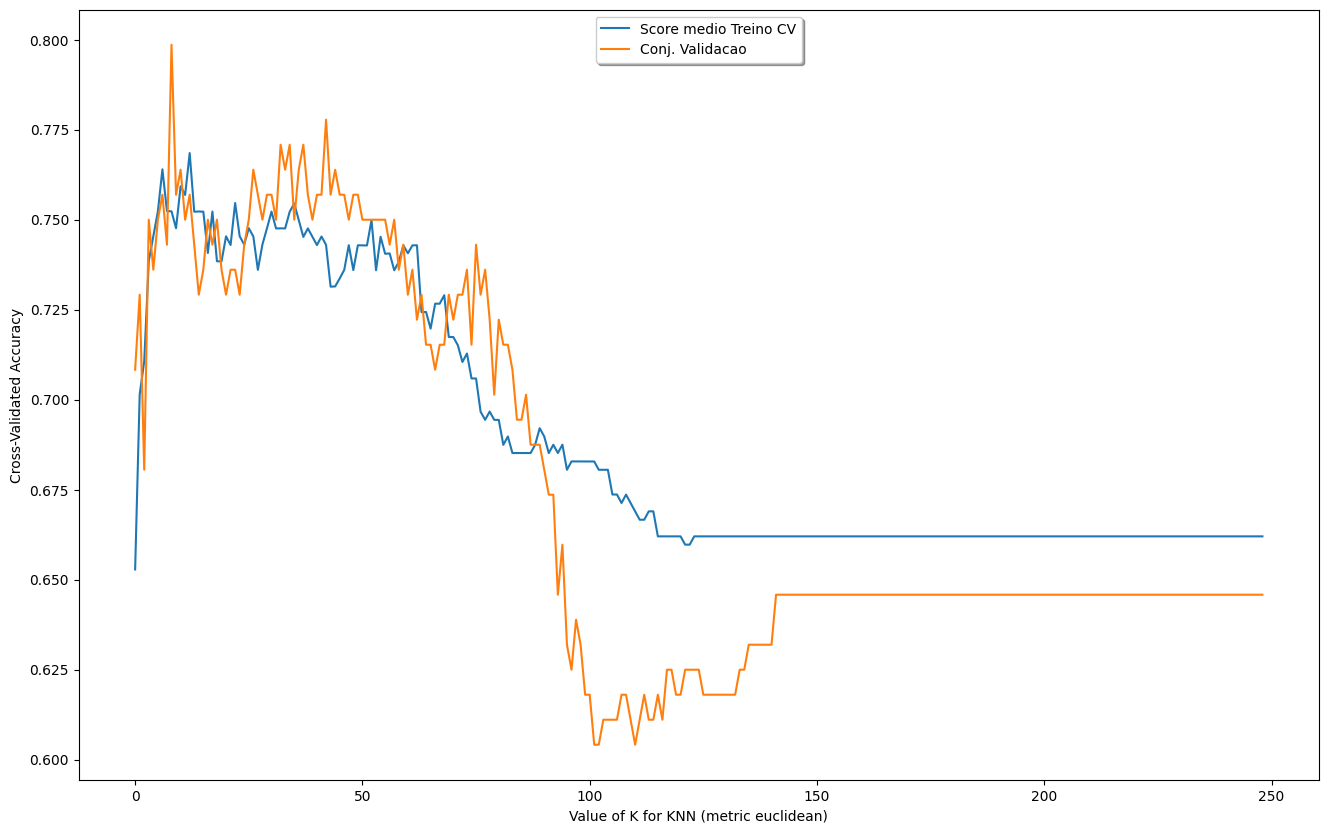

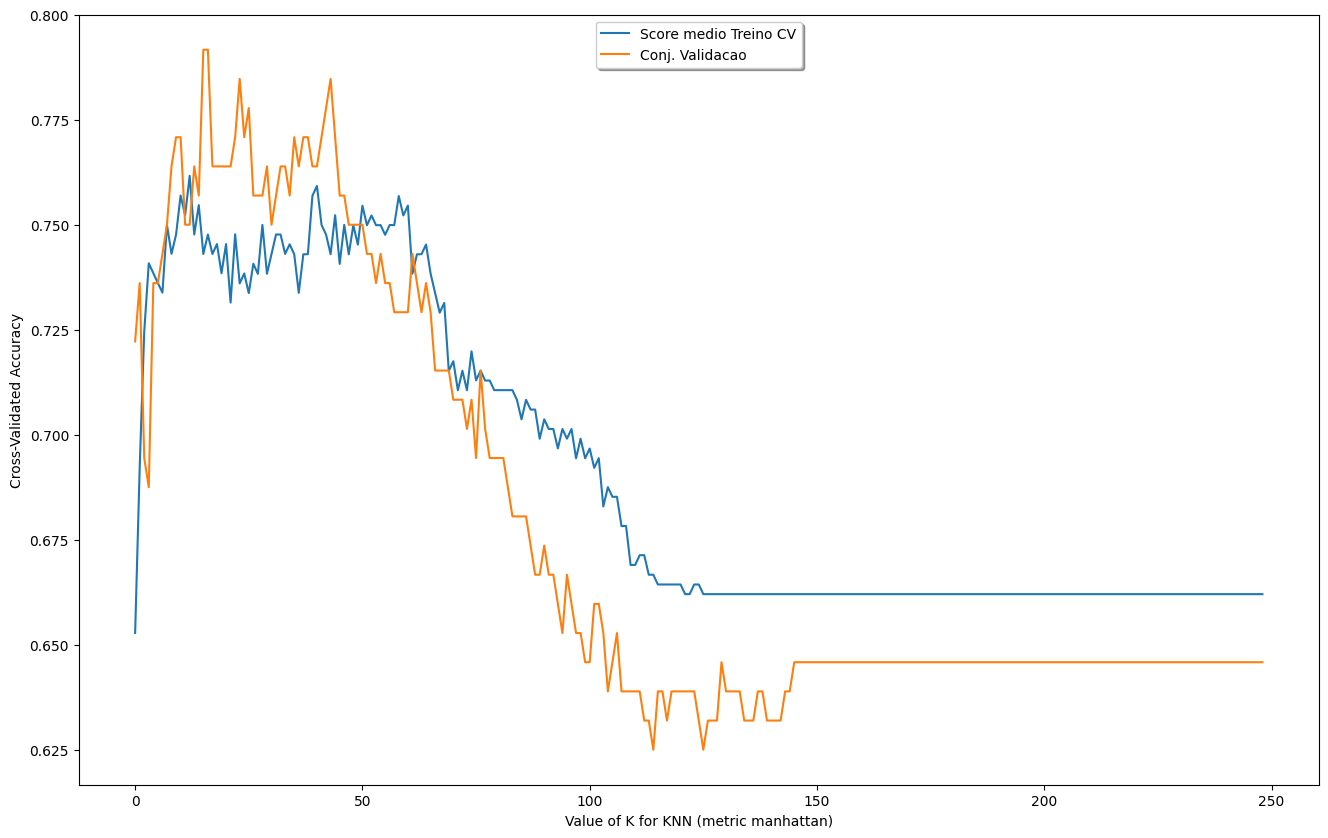

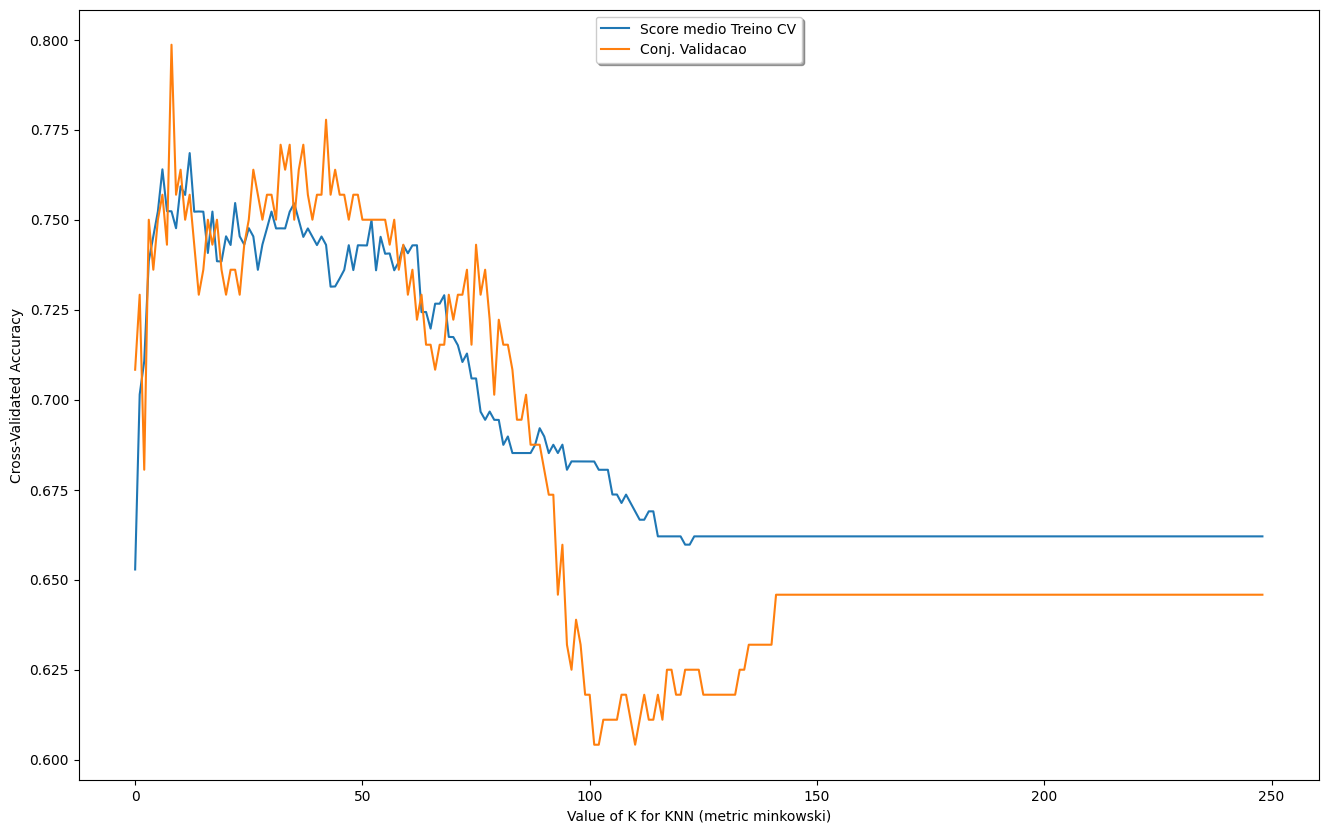

In [2]:
k_range = range(1, 250) #k
vet_distancias = ["euclidean", "manhattan", "minkowski"]

parameters_scores = {}

#p_range = range(1, 198) #k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in vet_distancias:
    k_scores_train = []
    # k_scores_train_full = []
    k_scores_valid = []
    
    for j in k_range:
        knn = neighbors.KNeighborsClassifier(n_neighbors=j, metric=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_cross_val_score = scores.mean()
        k_scores_train.append(mean_cross_val_score)
        
        knn.fit(X_train, y_train)
        # train_score = knn.score(X_train, y_train)
        validation_score = knn.score(X_valid, y_valid)
        # k_scores_train_full.append(train_score)
        k_scores_valid.append(validation_score)

        # We store the parameters used under the average score of CV and validation set
        registered_scores = [mean_cross_val_score, validation_score]
        avg_score = round((sum(registered_scores) / len(registered_scores)), 6)
        parameters_scores[avg_score] = (k, j, registered_scores)

    # plot to see clearly
    plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
    #plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
    plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
    plt.legend(('Score medio Treino CV', 'Conj. Validacao'),
            loc='upper center', shadow=True)
    plt.xlabel(f'Value of K for KNN (metric {k})')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [4]:
# we create an instance of Neighbours Classifier and fit the data, using the best parameters.
best_avg = max(parameters_scores.keys())
(best_metric, best_neighbor_number, registered_scores) = parameters_scores[best_avg]

clf = neighbors.KNeighborsClassifier(n_neighbors=best_neighbor_number, metric=best_metric)
clf = clf.fit(X_train, y_train)

print("Classificador com os melhores parametros encontrados:")
print("neighbors:", best_neighbor_number)
print("metric:", best_metric)
print("Cross Val Score:", registered_scores[0])
print("validation set Score:", registered_scores[1])

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

Classificador com os melhores parametros encontrados:
neighbors: 9
metric: minkowski
Cross Val Score: 0.7523389468056669
validation set Score: 0.7986111111111112
Acuracia de treinamento clf: 0.799
Acuracia de teste clf: 0.693
